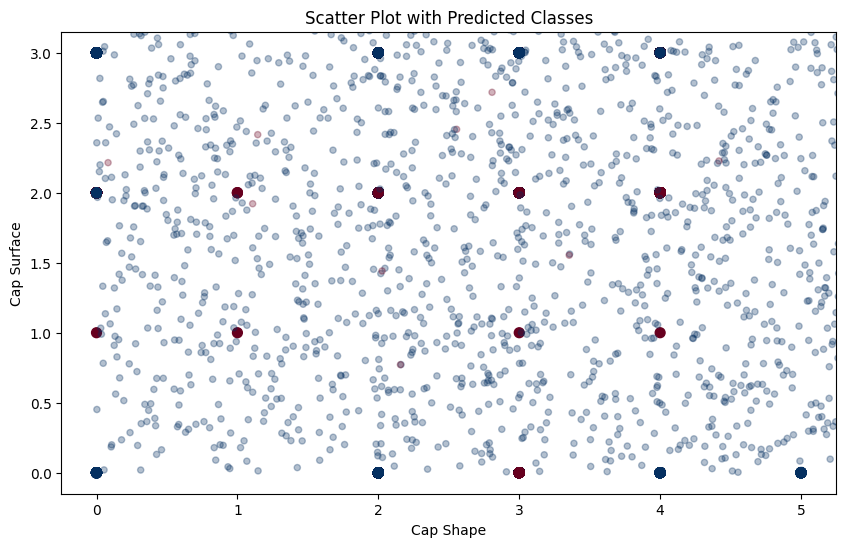

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3916
           1       0.89      0.90      0.89      4208

    accuracy                           0.89      8124
   macro avg       0.89      0.89      0.89      8124
weighted avg       0.89      0.89      0.89      8124



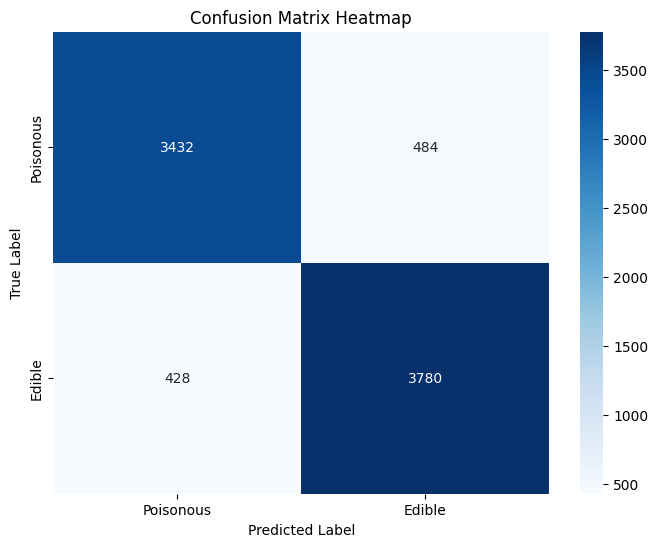

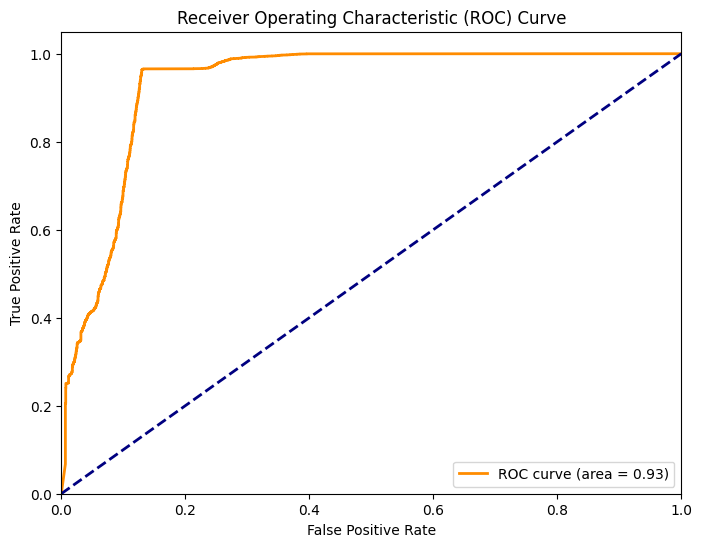

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns;

# Load the data
data = pd.read_csv('/content/mushrooms (1).csv')

# Replace categorical values with numerical values
replace_dict = {
    'cap-shape': {'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5},
    'cap-surface': {'f': 0, 'g': 1, 'y': 2, 's': 3},
    'cap-color': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9},
    'bruises': {'t': 0, 'f': 1},
    'odor': {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8},
    'gill-attachment': {'a': 0, 'd': 1, 'f': 2, 'n': 3},
    'gill-spacing': {'c': 0, 'w': 1, 'd': 2},
    'gill-size': {'b': 0, 'n': 1},
    'gill-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'g': 4, 'r': 5, 'o': 6, 'p': 7, 'u': 8, 'e': 9, 'w': 10, 'y': 11},
    'stalk-shape': {'e': 0, 't': 1},
    'stalk-root': {'b': 0, 'c': 1, 'u': 2, 'e': 3, 'z': 4, 'r': 5, '?': 6},
    'stalk-surface-above-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-surface-below-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-color-above-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'stalk-color-below-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'veil-type': {'p': 0, 'u': 1},
    'veil-color': {'n': 0, 'o': 1, 'w': 2, 'y': 3},
    'ring-number': {'n': 0, 'o': 1, 't': 2},
    'ring-type': {'c': 0, 'e': 1, 'f': 2, 'l': 3, 'n': 4, 'p': 5, 's': 6, 'z': 7},
    'spore-print-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'r': 4, 'o': 5, 'u': 6, 'w': 7, 'y': 8},
    'population': {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5},
    'habitat': {'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6},
    'class': {'p': 0, 'e': 1}
}

data.replace(replace_dict, inplace=True)

# Define X and y with all the relevant features
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
          'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
          'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
          'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
          'spore-print-color', 'population', 'habitat']]
y = data['class']


# Build and fit the model
model = GaussianNB()
model.fit(X, y)

# Generate new random data for predictions
rng = np.random.RandomState(0)
Xnew = 10 * rng.rand(8124, len(X.columns))

# Convert the new random data to a DataFrame with the same column names as X
Xnew_df = pd.DataFrame(Xnew, columns=X.columns)

# Predict with the model
ynew = model.predict(Xnew_df)

# For illustration, plot a scatter plot with the first two features
plt.figure(figsize=(10, 6))
plt.scatter(X['cap-shape'], X['cap-surface'], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim)
plt.xlabel('Cap Shape')
plt.ylabel('Cap Surface')
plt.title('Scatter Plot with Predicted Classes')
plt.show()

# Predict probabilities
yprob = model.predict_proba(Xnew_df)  # predicting probabilities for each label
print(yprob[0:10].round(2))

# Show accuracy
print(metrics.classification_report(y, model.predict(X)))

# Print the confusion matrix
mat = confusion_matrix(y, model.predict(X))
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

y_prob = model.predict_proba(X)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()